* [Autoregressions](https://www.statsmodels.org/devel/examples/notebooks/generated/autoregressions.html#)

In [5]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

%matplotlib inline
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("figure", figsize = (16, 6))
sns.mpl.rc("font", size = 14)

# data

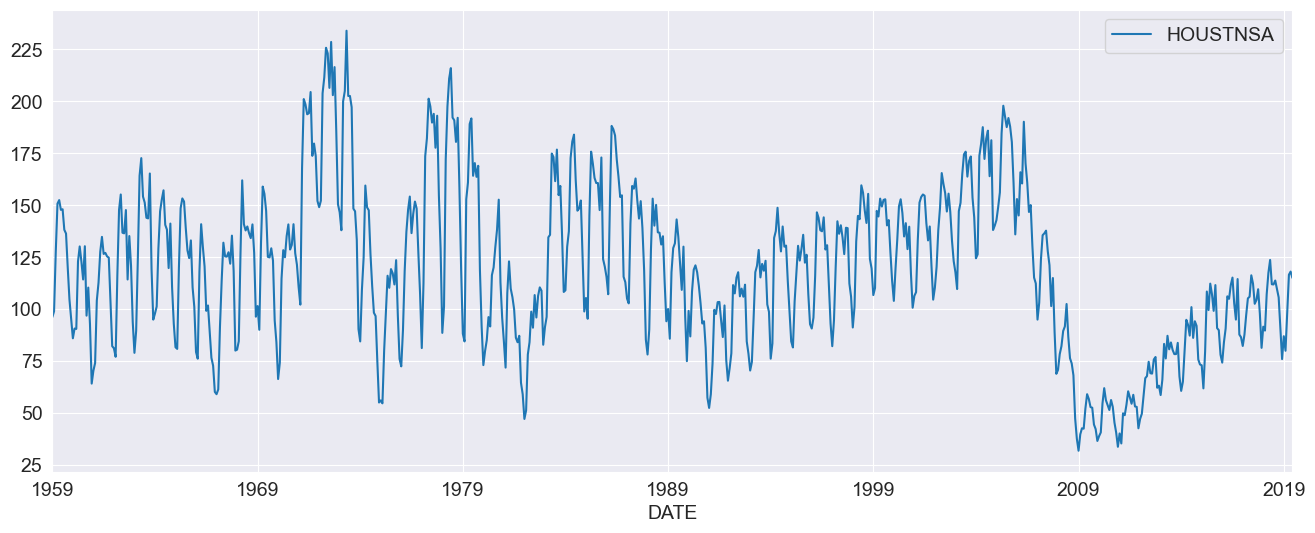

In [16]:
data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
fig, ax = plt.subplots()
ax = data.plot(ax = ax)

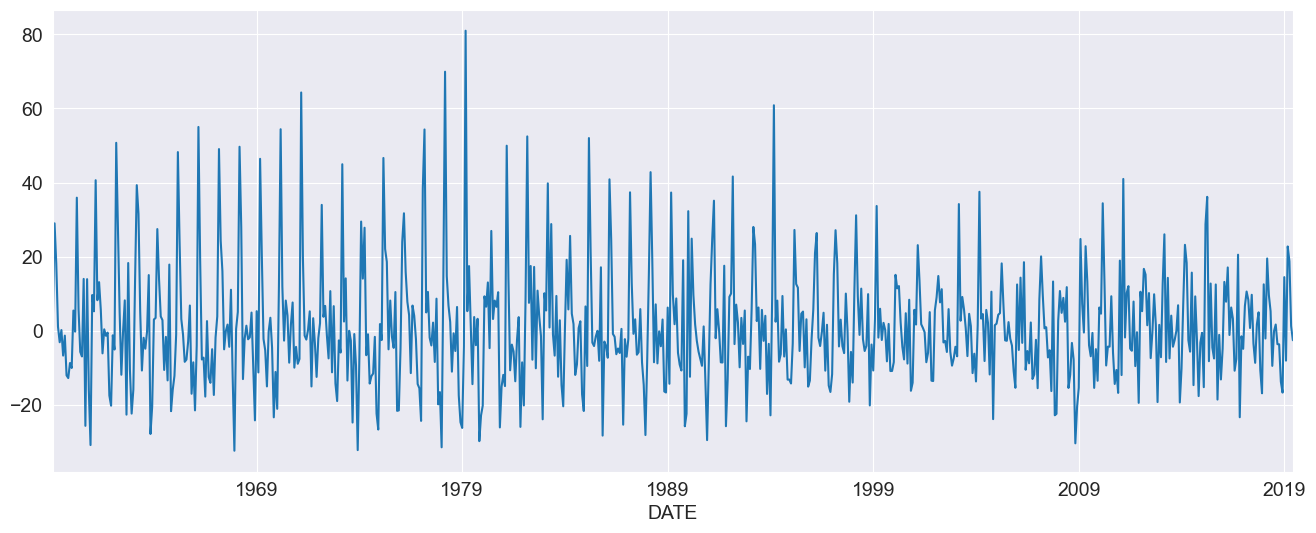

In [17]:
housing = data.HOUSTNSA.pct_change().dropna().asfreq("MS") * 100

fig, ax = plt.subplots()
ax = housing.plot(ax = ax)

# model

## model 1

In [30]:
model = AutoReg(housing, lags = 3)
fit1 = model.fit()
print(fit1.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Wed, 24 May 2023   AIC                           5996.884
Time:                        23:25:13   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

## model 2

In [31]:
fit2 = model.fit(cov_type = "HC0")
print(fit2.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Wed, 24 May 2023   AIC                           5996.884
Time:                        23:25:17   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.601      1.869      0.062      -0.055       2.300
HOUSTNSA.L1     0.1910      0.035      5.499      0.000       0.123       0.259
HOUSTNSA.L2     0.0058      0.039      0.150    

## model selection

In [35]:
model_select = ar_select_order(housing, maxlag = 13)
print(model_select.ar_lags)
fit3 = model_select.model.fit()
print(fit3.summary())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(13)   Log Likelihood               -2676.157
Method:               Conditional MLE   S.D. of innovations             10.378
Date:                Wed, 24 May 2023   AIC                           5382.314
Time:                        23:29:01   BIC                           5450.835
Sample:                    03-01-1960   HQIC                          5408.781
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3615      0.458      2.970      0.003       0.463       2.260
HOUSTNSA.L1     -0.2900      0.036     -8.161      0.000      -0.360      -0.220


In [42]:
preds = fit3.predict(start = 720, end = 840)
print(preds.values)

[  4.97725265  17.33712991  11.04010209  -0.42404342  -1.8735322
  -2.94769857   2.89068473  -2.50268831  -3.46748818 -12.87519986
 -10.22028483   3.31275087   3.7063983   15.24769445  16.59108584
   3.07981982  -1.89066267  -1.28886775   1.29143249  -0.45298361
  -4.50783046 -10.43305591  -8.83591894   0.54819866   6.21963173
  13.18441887  13.49618299   4.21557982  -1.11388415  -0.60567188
   1.06340351  -0.02501918  -4.33997013  -9.05130846  -7.83985022
  -0.42615797   6.62541987  11.86579559  11.35218612   4.49456661
  -0.30164809  -0.1829785    1.12270527   0.08355551  -3.98066619
  -8.00074416  -7.04255258  -0.7218171    6.33808121  10.73231559
   9.83895629   4.43763032   0.3461202    0.19799377   1.21721036
   0.14236622  -3.60718423  -7.12348923  -6.32907884  -0.76984607
   5.84639103   9.68342003   8.6993847    4.26797461   0.82793117
   0.54956924   1.3090816    0.19779865  -3.24828934  -6.36004405
  -5.67001805  -0.72435928   5.31563721   8.71673335   7.78400105
   4.070780

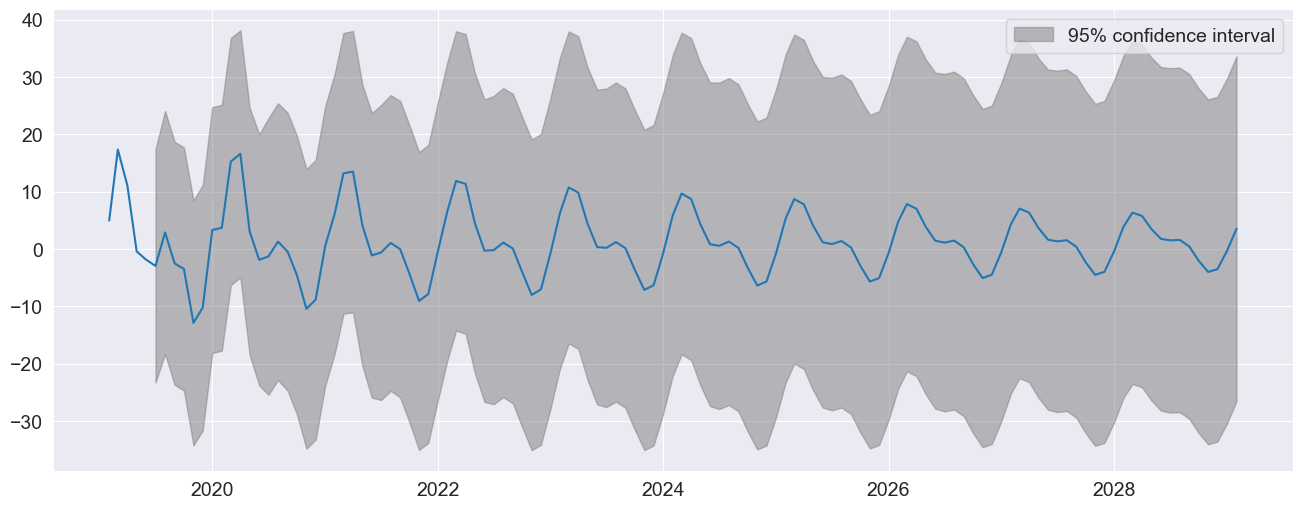

In [44]:
fig = fit3.plot_predict(start = 720, end = 840)

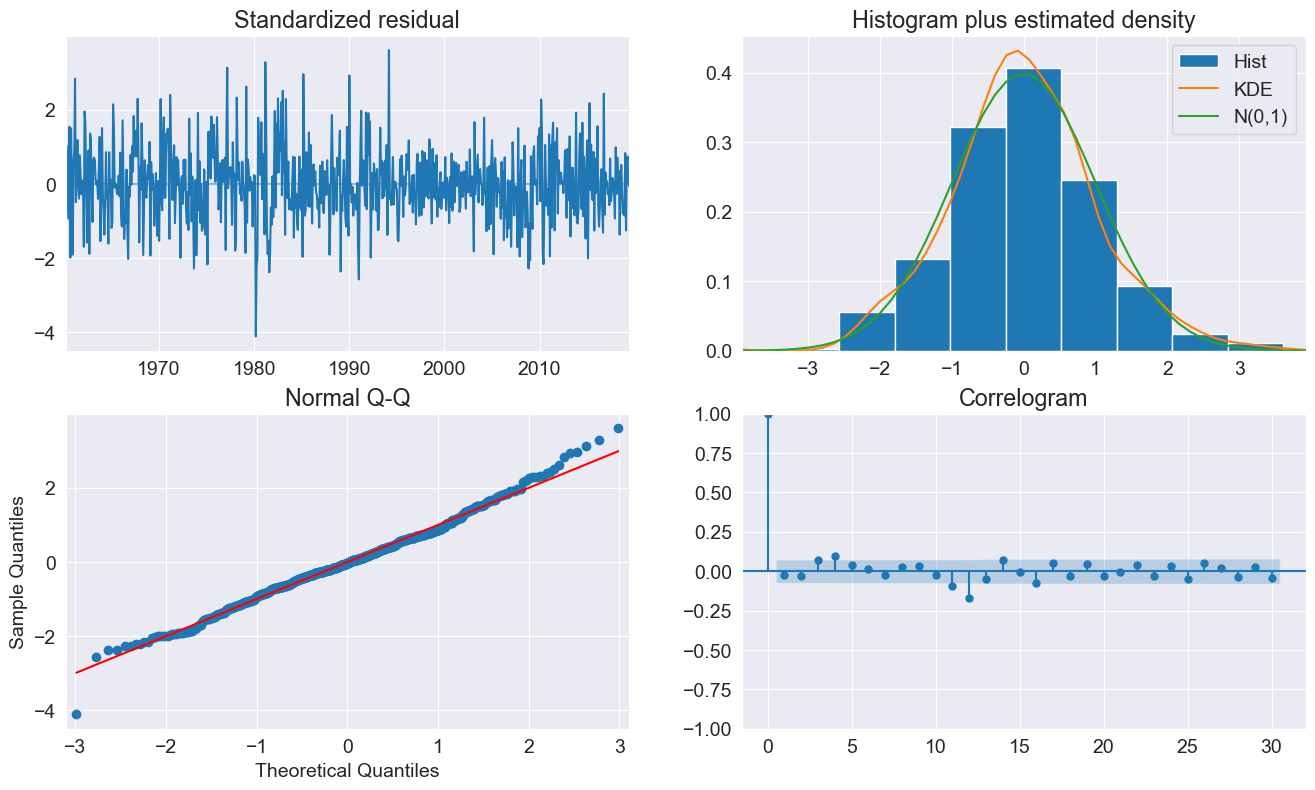

In [48]:
fig = plt.figure(figsize = (16, 9))
fig = fit3.plot_diagnostics(fig = fig, lags = 30)